In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv('./dataset-hourly-new-no-outlier.csv')
data.head()

,time,air_temperature_mean,pressure,humidity,vapor_pressure,wind_direction,wind_speed,wind_speed_cos,wind_speed_sin
0,1/1/1995 17:00,2.0,993,58.4,2.7,259,7.3,1.316926,7.180230
1,1/1/1995 19:00,1.2,993,67.3,2.9,249,6.2,-4.256081,-4.508412
2,1/1/1995 20:00,1.1,993,73.0,3.1,249,5.6,-3.844202,-4.072114
3,1/1/1995 21:00,0.7,993,78.9,3.3,258,6.2,5.735844,2.353741
4,1/1/1995 22:00,0.8,993,80.3,3.3,249,5.5,-3.775555,-3.999398


In [ ]:
fig, axs = plt.subplots(nrows=4, figsize=(15, 15))

sns.boxplot(x='air_temperature_mean', data=data, ax=axs[0])
sns.boxplot(x='pressure', data=data, ax=axs[1])
sns.boxplot(x='wind_direction', data=data, ax=axs[2])
sns.boxplot(x='wind_speed', data=data, ax=axs[3])

In [ ]:
def find_l_u(data, col_name):
    Q3 = data[col_name].quantile(0.75)
    Q1 = data[col_name].quantile(0.25)

    IQR = Q3-Q1
    upperLimit = Q3 + 1.5 * IQR
    lowerlimit = Q1 - 1.5 * IQR
    return (lowerlimit, upperLimit)

def remove_rows(data, col_name, upperlimit=None, lowerlimit=None):
    dataNew = data.copy()
    p_len = len(dataNew)
    print(f'Previous Length: {p_len}')
    if upperlimit:
        dataNew = dataNew[dataNew[col_name] < upperlimit]
        print(f'Length after remove upper outliers: {len(dataNew)}')
        print(f'Upper Rows removed: {p_len - len(dataNew)}')
    if lowerlimit:
        dataNew = dataNew[dataNew[col_name] > lowerlimit]
        print(f'Length after remove lower outliers: {len(dataNew)}')
        print(f'Lower Rows removed: {p_len - len(dataNew)}')
    n_len = len(dataNew)
    print(f'Total Rows removed: {p_len - n_len}')
    return dataNew

def boxplot_df(dataNew):
    fig, axs = plt.subplots(nrows=4, figsize=(15, 15))

    sns.boxplot(x='air_temperature_mean', data=dataNew, ax=axs[0])
    sns.boxplot(x='pressure', data=dataNew, ax=axs[1])
    sns.boxplot(x='wind_direction', data=dataNew, ax=axs[2])
    sns.boxplot(x='wind_speed', data=dataNew, ax=axs[3])

In [ ]:
def remove_do(data, column):
    lower, upper = find_l_u(data, column)
    print(f'Lower is: {lower}, Upper is: {upper}')
    data_n = remove_rows(data, column, upperlimit=upper, lowerlimit=lower)
    sns.boxplot(x=column, data=data_n)
    return data_n

In [ ]:
data_1 = remove_do(data, 'humidity')

In [ ]:
data_2 = remove_do(data_1, 'vapor_pressure')

In [ ]:
data_3 = remove_do(data_2, 'wind_speed_sin')

In [ ]:
data_4 = remove_do(data_3, 'wind_speed_cos')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mmdata=MinMaxScaler().fit_transform(data[['air_temperature_mean', 'pressure', 'wind_direction', 'wind_speed']])

In [ ]:
fig, axs = plt.subplots(nrows=4, figsize=(15, 15))

sns.boxplot(x=mmdata[:,0], ax=axs[0])
sns.boxplot(x=mmdata[:,1],  ax=axs[1])
sns.boxplot(x=mmdata[:,2], ax=axs[2])
sns.boxplot(x=mmdata[:,3], ax=axs[3])

In [ ]:
data_4.to_csv('./dataset-hourly-new-no-outlier.csv')

In [ ]:
data.columns[0]

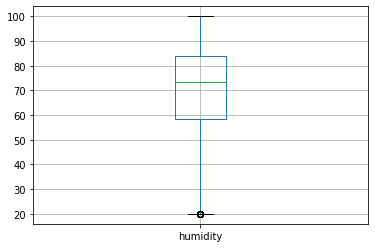

In [5]:
data.boxplot(column=data.columns[3] ,return_type='axes')